# Point Analysis 

## Import libraries 
 
 Steps:
 1. Import regulars (e.g. pandas, numpy, and matplotlib) 
 2. Import some other libraries to explore point patterns

In [1]:
# the usuals
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx

# new for data viz
import seaborn as sns

# to explore point patterns
from pointpats import centrography
from matplotlib.patches import Ellipse
import numpy

/opt/conda/lib/python3.8/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.8.1-CAPI-1.13.3) is incompatible with the GEOS version PyGEOS was compiled with (3.9.0-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
df =  pd.read_csv('indonesia all geocoded province 2011_2020_final - Sheet1.csv')

In [3]:
gdf = gpd.GeoDataFrame(df, 
                     crs='EPSG:4326',
                     geometry=gpd.points_from_xy(df.Longitude, df.Latitude))

In [4]:
gdf = gdf[gdf.Longitude!=0]

In [5]:
gdf=gdf[['Year','Location','Total Deaths','geometry']]

In [6]:
gdf = gdf.dropna()

In [7]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [8]:
gdf.Year.value_counts()

2020    37
2017    25
2016    25
2019    20
2014    14
2015    13
2013    12
2018    11
2012    10
2021     5
2011     4
Name: Year, dtype: int64

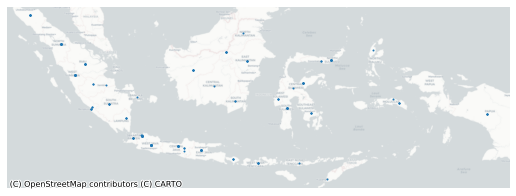

In [9]:
ax =gdf.plot(figsize=(9,9), markersize=1)

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

In [10]:
gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y

In [11]:
mean_center = centrography.mean_center(gdf[['x','y']])
med_center = centrography.euclidean_median(gdf[['x','y']])

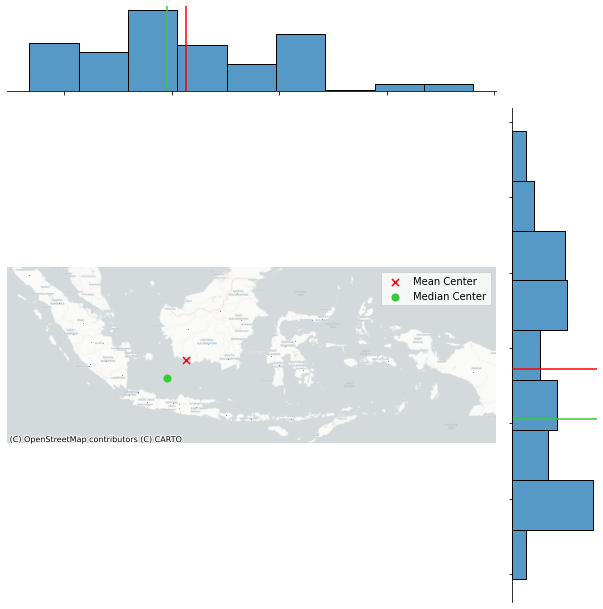

In [12]:
# Generate scatter plot
g = sns.jointplot(
    x='x', y='y', data=gdf, s=0.75, height=9
)

# Add mean point and marginal lines
g.ax_joint.scatter(
    *mean_center, color='red', marker='x', s=50, label='Mean Center'
)
g.ax_marg_x.axvline(mean_center[0], color='red')
g.ax_marg_y.axhline(mean_center[1], color='red')

# Add median point and marginal lines
g.ax_joint.scatter(
    *med_center, color='limegreen', marker='o', s=50, label='Median Center'
)
g.ax_marg_x.axvline(med_center[0], color='limegreen')
g.ax_marg_y.axhline(med_center[1], color='limegreen')

# Legend
g.ax_joint.legend()

# Add basemap
ctx.add_basemap(
    g.ax_joint, 
    crs='epsg:4326',
    source=ctx.providers.CartoDB.Positron
)

# Clean axes
g.ax_joint.set_axis_off()

# Display
plt.show()


In [13]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

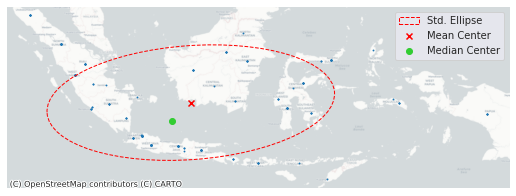

In [14]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

In [15]:
gdf.head()

,Year,Location,Total Deaths,geometry,x,y
2,2011,Aceh province,21.0,POINT (96.74940 4.69513),96.749399,4.695135
3,2011,Papua province,18.0,POINT (138.08035 -4.26993),138.080353,-4.269928
4,2011,Jawa Tengah province,10.0,POINT (110.14026 -7.15097),110.140259,-7.150975
5,2011,Papua province,13.0,POINT (138.08035 -4.26993),138.080353,-4.269928
6,2012,Maluku province,8.0,POINT (130.14527 -3.23846),130.145273,-3.238462


In [16]:
major, minor, rotation = centrography.ellipse(gdf[['x','y']])

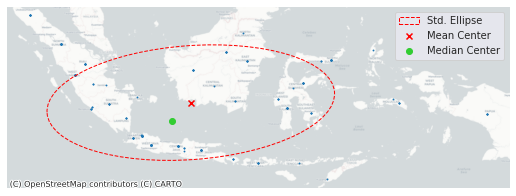

In [17]:
# set the style without grid lines
sns.set_style('dark')

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))

# Plot points
ax.scatter(gdf['x'], gdf['y'], s=0.75)
ax.scatter(*mean_center, color='red', marker='x', label='Mean Center')
ax.scatter(*med_center, color='limegreen', marker='o', label='Median Center')

# Construct the standard ellipse using matplotlib
ellipse = Ellipse(xy=mean_center, # center the ellipse on our mean center
                  width=major*2, # centrography.ellipse only gives half the axis
                  height=minor*2, 
                  angle = numpy.rad2deg(rotation), # Angles for this are in degrees, not radians
                  facecolor='none', 
                  edgecolor='red', 
                  linestyle='--',
                  label='Std. Ellipse')

ax.add_patch(ellipse)

ax.legend()

ax.axis('off')

# add a basemap
ctx.add_basemap(ax,
                crs='epsg:4326',
                source=ctx.providers.CartoDB.Positron)

# Display
plt.show()

In [18]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [19]:
gdf=gdf[['Year','Location','Total Deaths','geometry']]

In [20]:
gdf.columns = ['year','location','deaths','geometry']

In [21]:
gdf.deaths.value_counts()

6.0      22
2.0      19
4.0      18
9.0      16
10.0     14
7.0      13
1.0      12
8.0       9
13.0      6
3.0       6
66.0      5
5.0       5
21.0      4
11.0      4
12.0      3
17.0      3
15.0      3
105.0     2
32.0      2
14.0      2
18.0      2
20.0      2
34.0      1
53.0      1
35.0      1
206.0     1
Name: deaths, dtype: int64

In [22]:
gdf.deaths.head()

2    21.0
3    18.0
4    10.0
5    13.0
6     8.0
Name: deaths, dtype: float64

2    21.0
3    18.0
4    10.0
5    13.0
6     8.0
Name: deaths, dtype: float64

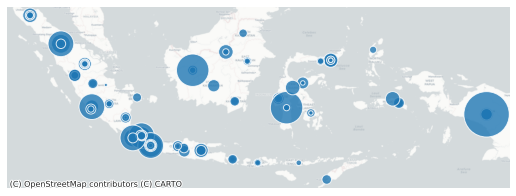

In [23]:
# table
display(gdf.deaths.head()) 

# map
ax = gdf.plot(figsize=(9,9), markersize=gdf.deaths*10,alpha=0.8,edgecolor='w')

# axis
ax.axis('off')

# basemap
ctx.add_basemap(ax,
                crs='epsg:4326', # surprise! You can change the crs here!
                source=ctx.providers.CartoDB.Positron)

# Flood Areas and Rankings

In [24]:
%matplotlib inline
import pandas as pd
import contextily as cx
import geopandas as gpd
import rasterio
from rasterio.plot import show as rioshow
import matplotlib.pyplot as plt

In [25]:
bnd = gpd.read_file('boundaries')
bnd.head()

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,validTo,geometry
0,2.360029,0.228968,Aceh Barat,ID1107,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ..."
1,1.963994,0.154136,Aceh Barat Daya,ID1112,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7..."
2,4.590182,0.236396,Aceh Besar,ID1108,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2..."
3,3.287754,0.316161,Aceh Jaya,ID1116,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6..."
4,4.448584,0.343038,Aceh Selatan,ID1103,None,None,None,Aceh,ID11,Indonesia,ID,2019-12-20,2020-04-01,None,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8..."


In [26]:
bnd.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  522 non-null    float64 
 1   Shape_Area  522 non-null    float64 
 2   ADM2_EN     522 non-null    object  
 3   ADM2_PCODE  522 non-null    object  
 4   ADM2_REF    0 non-null      object  
 5   ADM2ALT1EN  0 non-null      object  
 6   ADM2ALT2EN  0 non-null      object  
 7   ADM1_EN     522 non-null    object  
 8   ADM1_PCODE  522 non-null    object  
 9   ADM0_EN     522 non-null    object  
 10  ADM0_PCODE  522 non-null    object  
 11  date        522 non-null    object  
 12  validOn     522 non-null    object  
 13  validTo     0 non-null      object  
 14  geometry    522 non-null    geometry
dtypes: float64(2), geometry(1), object(12)
memory usage: 61.3+ KB


In [27]:
columns_to_keep = ['Shape_Leng',
                   'Shape_Area',
                   'ADM2_EN',
                   'geometry']

In [28]:
bnd=bnd[columns_to_keep]

In [29]:
#boundaries
idn = pd.read_csv("Weeks/Week03/idn_geoinfo.csv")
idn.head()

,OBJECTID *,Shape *,admin2Name_en,districts,Latitude,Longitude,admin2Pcode,admin2RefName,admin2AltName1_en,admin2AltName2_en,admin1Name_en,admin1Pcode,admin0Name_en,admin0Pcode,date,validOn,validTo,Shape_Length,Shape_Area
0,1,Polygon,Aceh Barat,ACEH BARAT,4.454275,96.152698,ID1107,<Null>,<Null>,<Null>,Aceh,ID11,Indonesia,ID,12/20/19,4/1/20,<Null>,2.360029,0.228968
1,2,Polygon,Aceh Barat Daya,ACEH BARAT DAYA,3.796343,97.006839,ID1112,<Null>,<Null>,<Null>,Aceh,ID11,Indonesia,ID,12/20/19,4/1/20,<Null>,1.963994,0.154136
2,3,Polygon,Aceh Besar,ACEH BESAR,5.452917,95.477781,ID1108,<Null>,<Null>,<Null>,Aceh,ID11,Indonesia,ID,12/20/19,4/1/20,<Null>,4.590182,0.236396
3,4,Polygon,Aceh Jaya,ACEH JAYA,4.787368,95.645795,ID1116,<Null>,<Null>,<Null>,Aceh,ID11,Indonesia,ID,12/20/19,4/1/20,<Null>,3.287754,0.316161
4,5,Polygon,Aceh Selatan,ACEH SELATAN,3.311506,97.351656,ID1103,<Null>,<Null>,<Null>,Aceh,ID11,Indonesia,ID,12/20/19,4/1/20,<Null>,4.448584,0.343038


In [30]:
columns_to_keep = ['admin2Name_en',
                   'districts',
                   'Latitude',
                   'Longitude']

In [31]:
idn=idn[columns_to_keep]

In [32]:
idn=idn.join(bnd.set_index("ADM2_EN"), on="admin2Name_en")

In [33]:
loss = pd.read_csv('idn_loss.csv')
loss.head()

,Serial,Event,Code Province,Province,Code District,District,Code Sub-District,Sub-District,Location,Date (YMD),...,Houses Damaged,Victims,Affected,Relocated,Evacuated,Losses $USD,Losses $Local,Education centers,Hospitals,Damages in crops Ha.
0,15055,FIRE,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2011/7/3,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
1,14019,SURGE,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2011/2/6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8682,TSUNAMI,51,BALI,5103.0,BADUNG,NaN,NaN,NaN,1977/8/19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14296,FIRE,51,BALI,5104.0,GIANYAR,NaN,NaN,NaN,2011/3/21,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN
4,17497,LANDSLIDES,51,BALI,5108.0,BULELENG,NaN,NaN,NaN,2012/12/22,...,NaN,NaN,NaN,NaN,NaN,NaN,122.5,NaN,NaN,NaN


In [34]:
loss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17931 entries, 0 to 17930
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Serial                17931 non-null  int64  
 1   Event                 17931 non-null  object 
 2   Code Province         17931 non-null  int64  
 3   Province              17931 non-null  object 
 4   Code District         17775 non-null  float64
 5   District              17775 non-null  object 
 6   Code Sub-District     0 non-null      float64
 7   Sub-District          0 non-null      float64
 8   Location              3472 non-null   object 
 9   Date (YMD)            17931 non-null  object 
 10  Comments              14429 non-null  object 
 11  Cause                 0 non-null      float64
 12  Description of Cause  0 non-null      float64
 13  Source                17553 non-null  object 
 14  Magnitude             0 non-null      float64
 15  GLIDEnumber        

In [35]:
columns_to_keep = ['Event',
 'Province',
 'District',
 'Date (YMD)',
 'Deaths',
 'Injured',
 'Missing',
 'Houses Destroyed',
 'Houses Damaged',
 'Evacuated',
 'Losses $Local']
loss = loss[columns_to_keep]
loss.head()

,Event,Province,District,Date (YMD),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Evacuated,Losses $Local
0,FIRE,BALI,BULELENG,2011/7/3,NaN,NaN,NaN,NaN,NaN,NaN,15.0
1,SURGE,BALI,BULELENG,2011/2/6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TSUNAMI,BALI,BADUNG,1977/8/19,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,FIRE,BALI,GIANYAR,2011/3/21,NaN,NaN,NaN,NaN,NaN,NaN,50.0
4,LANDSLIDES,BALI,BULELENG,2012/12/22,NaN,NaN,NaN,NaN,NaN,NaN,122.5


In [36]:
idn.join(loss.set_index("District"), on="districts")

,admin2Name_en,districts,Latitude,Longitude,Shape_Leng,Shape_Area,geometry,Event,Province,Date (YMD),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Evacuated,Losses $Local
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",LANDSLIDES,PEMERINTAH ACEH,2009/5/19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FIRE,PEMERINTAH ACEH,2009/10/10,NaN,1.0,NaN,NaN,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",LANDSLIDES,PEMERINTAH ACEH,2009/4/13,NaN,NaN,NaN,1.0,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,2010/6/9,2.0,NaN,NaN,NaN,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,1978/5/0,24.0,NaN,NaN,NaN,3000.0,4000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",STRONG WIND,JAWA TENGAH,2004/7/5,NaN,NaN,NaN,43.0,NaN,NaN,NaN
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",LANDSLIDES,JAWA TENGAH,2008/10/30,NaN,NaN,NaN,NaN,4.0,NaN,NaN
520,Yahukimo,YAHUKIMO,-4.493972,139.528000,5.771801,1.190892,"POLYGON ((139.96223 -3.60980, 139.96314 -3.609...",HUNGER,PAPUA,2005/12/9,55.0,112.0,NaN,NaN,NaN,NaN,NaN
520,Yahukimo,YAHUKIMO,-4.493972,139.528000,5.771801,1.190892,"POLYGON ((139.96223 -3.60980, 139.96314 -3.609...",EARTHQUAKE,PAPUA,1989/8/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
loss=idn.join(loss.set_index("District"), on="districts")

In [38]:
loss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17582 entries, 0 to 521
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   admin2Name_en     17582 non-null  object  
 1   districts         17582 non-null  object  
 2   Latitude          17581 non-null  float64 
 3   Longitude         17581 non-null  float64 
 4   Shape_Leng        17582 non-null  float64 
 5   Shape_Area        17582 non-null  float64 
 6   geometry          17582 non-null  geometry
 7   Event             17516 non-null  object  
 8   Province          17516 non-null  object  
 9   Date (YMD)        17516 non-null  object  
 10  Deaths            2236 non-null   float64 
 11  Injured           1808 non-null   float64 
 12  Missing           371 non-null    float64 
 13  Houses Destroyed  3238 non-null   float64 
 14  Houses Damaged    1404 non-null   float64 
 15  Evacuated         2096 non-null   float64 
 16  Losses $Local     3431 n

In [39]:
flood=loss[loss["Event"] == "FLOODS"] 
flood

,admin2Name_en,districts,Latitude,Longitude,Shape_Leng,Shape_Area,geometry,Event,Province,Date (YMD),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Evacuated,Losses $Local
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,2010/6/9,2.0,NaN,NaN,NaN,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,1978/5/0,24.0,NaN,NaN,NaN,3000.0,4000.0,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,2008/10/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,2009/12/13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",FLOODS,PEMERINTAH ACEH,2007/11/9,NaN,NaN,NaN,NaN,NaN,1584.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",FLOODS,JAWA TENGAH,2009/1/13,NaN,NaN,NaN,1.0,NaN,NaN,3.0
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",FLOODS,JAWA TENGAH,2008/4/1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",FLOODS,JAWA TENGAH,2010/4/4,1.0,NaN,NaN,NaN,NaN,NaN,NaN
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",FLOODS,JAWA TENGAH,2003/1/4,NaN,NaN,NaN,NaN,NaN,NaN,70.0


In [40]:
from geopandas import GeoDataFrame

flood = GeoDataFrame(flood)

In [41]:
flood.dropna()

,admin2Name_en,districts,Latitude,Longitude,Shape_Leng,Shape_Area,geometry,Event,Province,Date (YMD),Deaths,Injured,Missing,Houses Destroyed,Houses Damaged,Evacuated,Losses $Local


In [42]:
import contextily as ctx

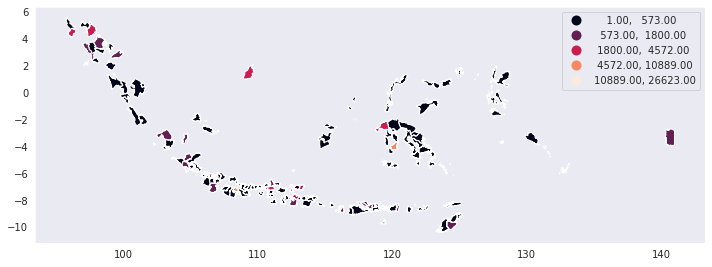

In [43]:
flood.plot(figsize=(12,10),
                 column='Houses Damaged',
                 legend=True, 
                 scheme='NaturalBreaks')

In [44]:
flood.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 5590 entries, 0 to 519
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   admin2Name_en     5590 non-null   object  
 1   districts         5590 non-null   object  
 2   Latitude          5590 non-null   float64 
 3   Longitude         5590 non-null   float64 
 4   Shape_Leng        5590 non-null   float64 
 5   Shape_Area        5590 non-null   float64 
 6   geometry          5590 non-null   geometry
 7   Event             5590 non-null   object  
 8   Province          5590 non-null   object  
 9   Date (YMD)        5590 non-null   object  
 10  Deaths            613 non-null    float64 
 11  Injured           282 non-null    float64 
 12  Missing           122 non-null    float64 
 13  Houses Destroyed  485 non-null    float64 
 14  Houses Damaged    273 non-null    float64 
 15  Evacuated         882 non-null    float64 
 16  Losses $Local    

In [45]:
import plotly.express as px

In [48]:
flood_count = flood['districts'].value_counts()
flood_count

BANDUNG               187
CILACAP                79
BOJONEGORO             67
KOTA JAKARTA TIMUR     55
PASURUAN               52
                     ... 
KOTA SABANG             1
KOTA CIMAHI             1
KOTA KEDIRI             1
PAKPAK BHARAT           1
KOTA PAYAKUMBUH         1
Name: districts, Length: 427, dtype: int64

In [49]:
flood_count = flood_count.reset_index()
flood_count

,index,districts
0,BANDUNG,187
1,CILACAP,79
2,BOJONEGORO,67
3,KOTA JAKARTA TIMUR,55
4,PASURUAN,52
...,...,...
422,KOTA SABANG,1
423,KOTA CIMAHI,1
424,KOTA KEDIRI,1
425,PAKPAK BHARAT,1


In [50]:
flood_count.columns.to_list()
flood_count.columns = ['districts', 'count']
flood_count

,districts,count
0,BANDUNG,187
1,CILACAP,79
2,BOJONEGORO,67
3,KOTA JAKARTA TIMUR,55
4,PASURUAN,52
...,...,...
422,KOTA SABANG,1
423,KOTA CIMAHI,1
424,KOTA KEDIRI,1
425,PAKPAK BHARAT,1


In [51]:
flood_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 427 entries, 0 to 426
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   districts  427 non-null    object
 1   count      427 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.8+ KB


In [52]:
idn.join(flood_count.set_index("districts"), on="districts")

,admin2Name_en,districts,Latitude,Longitude,Shape_Leng,Shape_Area,geometry,count
0,Aceh Barat,ACEH BARAT,4.454275,96.152698,2.360029,0.228968,"POLYGON ((96.26836 4.76800, 96.26822 4.76250, ...",15.0
1,Aceh Barat Daya,ACEH BARAT DAYA,3.796343,97.006839,1.963994,0.154136,"MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7...",9.0
2,Aceh Besar,ACEH BESAR,5.452917,95.477781,4.590182,0.236396,"MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2...",11.0
3,Aceh Jaya,ACEH JAYA,4.787368,95.645795,3.287754,0.316161,"MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6...",11.0
4,Aceh Selatan,ACEH SELATAN,3.311506,97.351656,4.448584,0.343038,"MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8...",26.0
...,...,...,...,...,...,...,...,...
517,Way Kanan,WAY KANAN,-4.496369,104.565527,3.508874,0.297509,"POLYGON ((104.92793 -4.19234, 104.92823 -4.192...",10.0
518,Wonogiri,WONOGIRI,-7.884648,111.046041,2.718402,0.157671,"POLYGON ((111.18204 -7.71237, 111.18242 -7.712...",27.0
519,Wonosobo,WONOSOBO,-7.363209,109.900180,1.828518,0.081405,"POLYGON ((109.93000 -7.19465, 109.93017 -7.194...",10.0
520,Yahukimo,YAHUKIMO,-4.493972,139.528000,5.771801,1.190892,"POLYGON ((139.96223 -3.60980, 139.96314 -3.609...",NaN


In [53]:
idn=idn.join(flood_count.set_index("districts"), on="districts")

In [54]:
from geopandas import GeoDataFrame

idn = GeoDataFrame(idn)

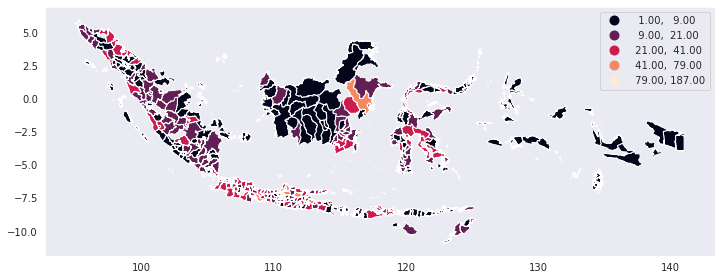

In [55]:
idn.plot(figsize=(12,10),
                 column='count',
                 legend=True, 
                 scheme='NaturalBreaks')

In [56]:
top10_flood_count = flood_count.head(10)
top10_flood_count

,districts,count
0,BANDUNG,187
1,CILACAP,79
2,BOJONEGORO,67
3,KOTA JAKARTA TIMUR,55
4,PASURUAN,52
5,PATI,47
6,KUTAI KARTANEGARA,46
7,DEMAK,44
8,GROBOGAN,43
9,CIAMIS,41


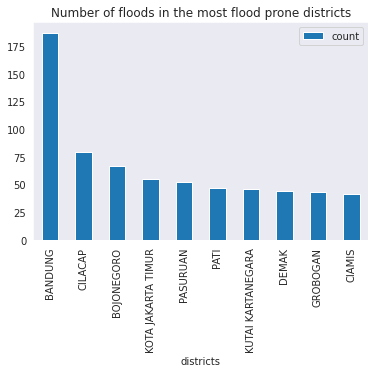

In [57]:
top10_flood_count.plot.bar(x = 'districts', y = 'count', title = 'Number of floods in the most flood prone districts')

In [58]:
bottom10_flood_count = flood_count.tail(5)
bottom10_flood_count

,districts,count
422,KOTA SABANG,1
423,KOTA CIMAHI,1
424,KOTA KEDIRI,1
425,PAKPAK BHARAT,1
426,KOTA PAYAKUMBUH,1


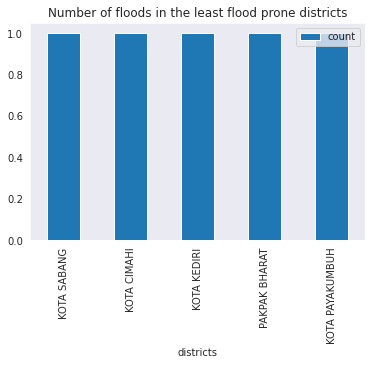

In [59]:
bottom10_flood_count.plot.bar(x = 'districts', y = 'count', title = 'Number of floods in the least flood prone districts')